In [13]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import torch

In [2]:
path = Path("../input/asl_alphabet_train/asl_alphabet_train")

In [3]:
classes = ['space','nothing','del','Z','Y','X','W','V','U','T','S','R','Q','P','O','N','M','L','K','J','I','H','G','F','E','D','C','B','A']

In [4]:
np.random.seed(12)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

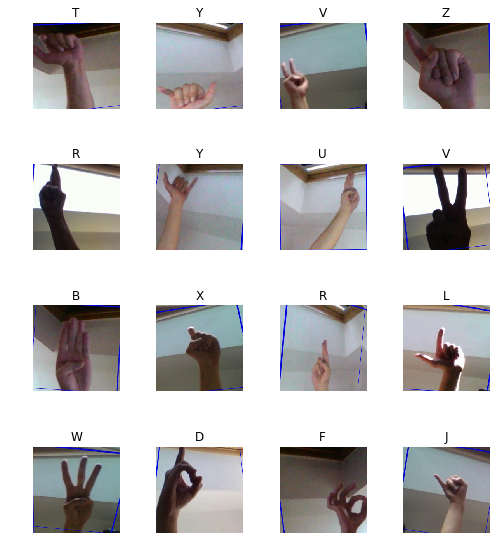

In [6]:
data.show_batch(rows=4, figsize=(7,8))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 130899797.73it/s]


In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.135990,0.040825,0.013563,08:40
1,0.058412,0.007432,0.002011,07:55
2,0.018363,0.002977,0.000805,07:56
3,0.014551,0.002299,0.000402,07:52


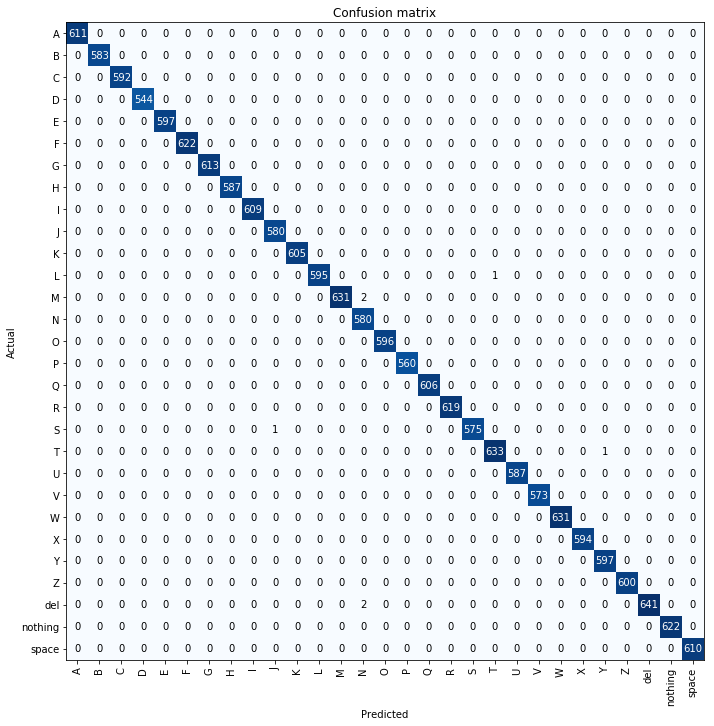

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))